In [2]:
library(ggplot2)
library (lmtest)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



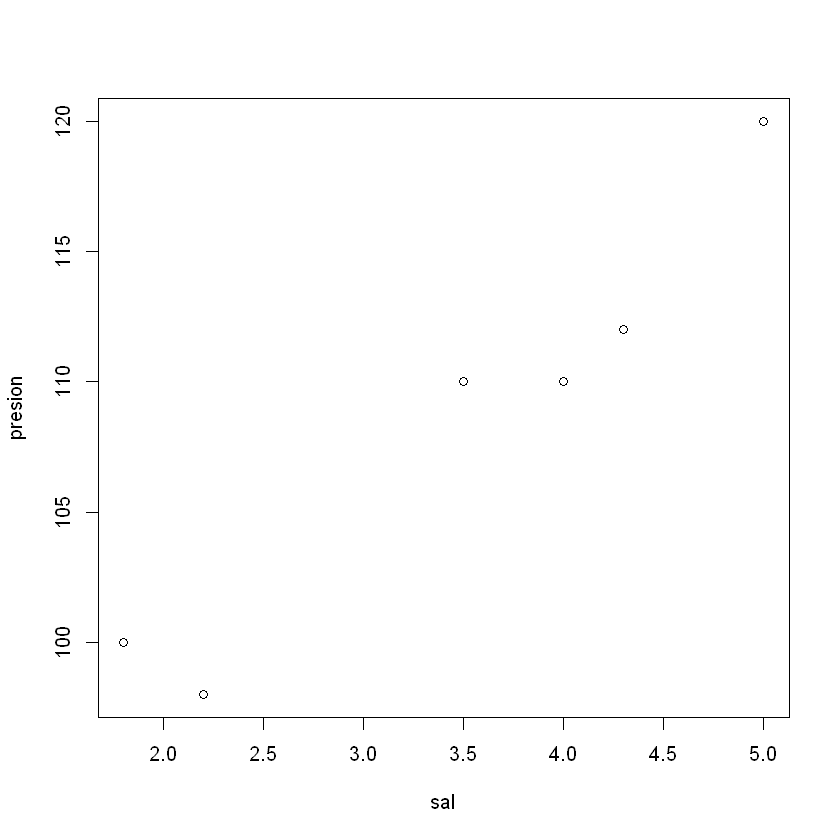

In [3]:
n <- 6
sal <- c(1.8,2.2,3.5,4.0,4.3,5.0)
presion<- c(100,98,110,110,112,120)
df <- data.frame(
"Sal"= sal,
"presión"=presion)
plot(sal,presion)

In [4]:
df

Sal,presión
1.8,100
2.2,98
3.5,110
4.0,110
4.3,112
5.0,120


In [5]:
regresion <- lm(presion~sal,data=df)
summary(regresion)
predict <- predict(regresion)


Call:
lm(formula = presion ~ sal, data = df)

Residuals:
     1      2      3      4      5      6 
 2.226 -2.309  1.455 -1.712 -1.613  1.952 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86.3708     3.0621  28.206  9.4e-06 ***
sal           6.3354     0.8395   7.546  0.00165 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 4 degrees of freedom
Multiple R-squared:  0.9344,	Adjusted R-squared:  0.918 
F-statistic: 56.95 on 1 and 4 DF,  p-value: 0.001652


estimadcion de los parametros

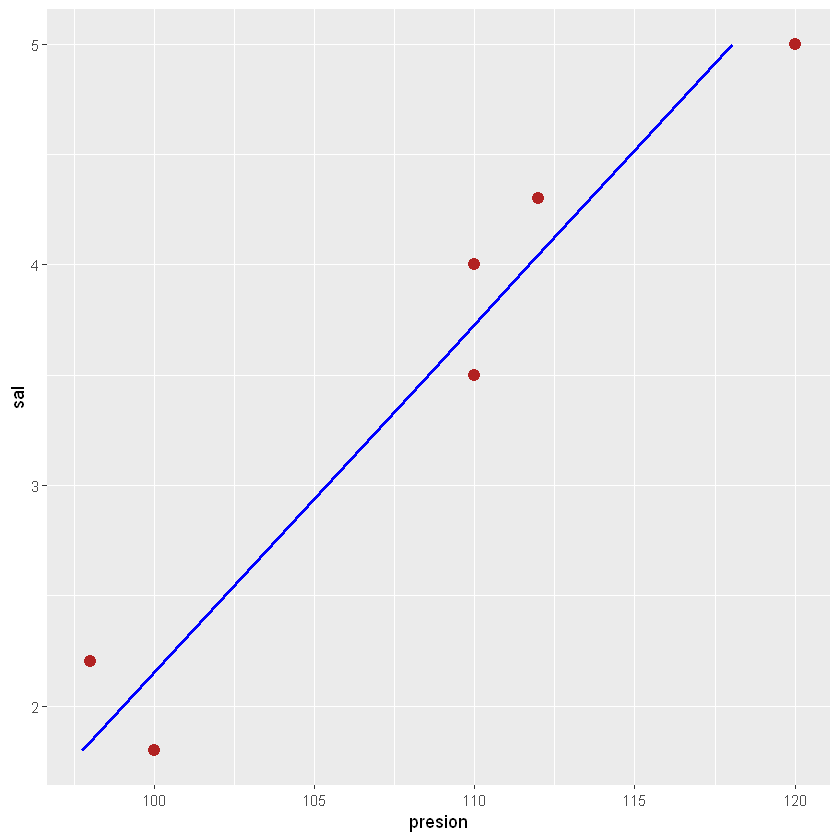

In [6]:
ggplot(data = df, mapping = aes(x = presion, y = sal)) +
geom_point(color = "firebrick", size = 3)+
geom_line(aes(x=predict), lwd = 1, color = 4)

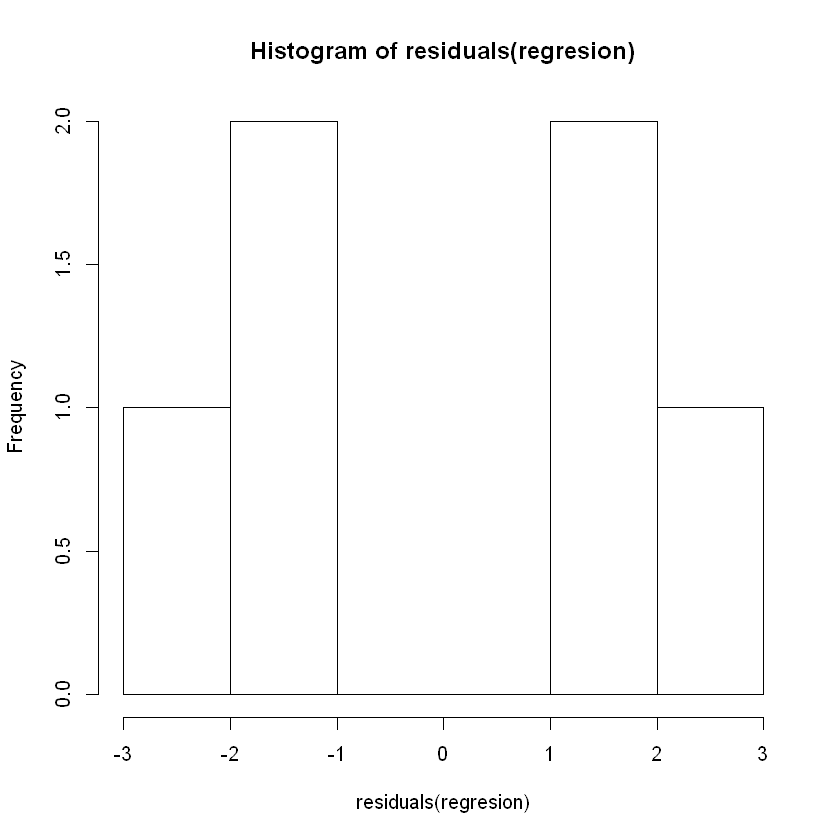

In [7]:
hist(residuals(regresion))

In [8]:
xm <- mean(sal)
ym <- mean(presion)
sxy <- sum((sal-xm)*(presion-ym))
sxx <- sum((sal-xm)^2)
syy <- sum((presion-ym)^2)
est.b1<- sxy/sxx
est.b0 <- ym - est.b1 *xm

In [9]:
cor(sal,presion, method= "pearson")
cov=sxy/5
cor = cov/(sd(sal)*sd(presion))
cor

[1] 0.9666274

[1] 0.9666274

In [10]:
est.b1
est.b0

[1] 6.33535

[1] 86.37079

In [11]:
ests2<-(1/(n-2))*sum((presion- predict)^2)
ests2

[1] 5.436474

In [12]:
sstotal <- sum((presion-mean(presion))^2)
ssresidual <- sum((presion-predict)^2)
ssreg <- sum((predict-mean(presion))^2)
ssreg/sstotal #coeficiente de determinacion

[1] 0.9343685

In [13]:
anova <- aov(regresion)
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
sal          1 309.59  309.59   56.95 0.00165 **
Residuals    4  21.75    5.44                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [14]:
summary(regresion)


Call:
lm(formula = presion ~ sal, data = df)

Residuals:
     1      2      3      4      5      6 
 2.226 -2.309  1.455 -1.712 -1.613  1.952 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86.3708     3.0621  28.206  9.4e-06 ***
sal           6.3354     0.8395   7.546  0.00165 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 4 degrees of freedom
Multiple R-squared:  0.9344,	Adjusted R-squared:  0.918 
F-statistic: 56.95 on 1 and 4 DF,  p-value: 0.001652


In [15]:
coef(regresion)

(Intercept)         sal 
   86.37079     6.33535

### intervalos de confianza para beta0, beta1 y s2

In [16]:
est.b0- qt(0.975, 4) * sqrt(ests2) * sqrt ( (1/n)+ (xm^2/sxx))
est.b0+ qt(0.975, 4) * sqrt(ests2) * sqrt ( (1/n)+ (xm^2/sxx))

[1] 77.86906

[1] 94.87251

In [17]:
est.b1- qt(0.975, 4) * (sqrt(ests2) / sqrt ( sxx))
est.b1+ qt(0.975, 4) * (sqrt(ests2) / sqrt ( sxx))

[1] 4.004434

[1] 8.666266

In [18]:
confint(regresion, level=0.95)

,2.5 %,97.5 %
(Intercept),77.869064,94.872509
sal,4.004434,8.666266


## Intervalo de confianza para la media de x 

In [19]:
y_gorro  <- 85.0056179775281  + 6.29645635263612 *mean(sal)
y_gorro - qt(0.975, 4) * sqrt(ests2) * sqrt((1+(1/nrow(df))))
y_gorro + qt(0.975, 4) * sqrt(ests2) * sqrt((1+(1/nrow(df))))

[1] 99.84102

[1] 113.8257

In [20]:
qt(0.975, 10)

[1] 2.228139

In [21]:
y_gorro

[1] 106.8333

## pregunta 2 

In [22]:
y <- c(3.1,1.9,1.7,1.6,3.2,2.7,2.6,2.9,4.7,3.8)
x1 <-c(113,123,127,138,130,146,151,152,141,159)
x2 <- c(1,2,3,4,5,6,7,8,9,10)

In [23]:
pregunta2 <-data.frame(
"y" = y,
"x1"=x1,
"x2"=x2)
pregunta2


y,x1,x2
3.1,113,1
1.9,123,2
1.7,127,3
1.6,138,4
3.2,130,5
2.7,146,6
2.6,151,7
2.9,152,8
4.7,141,9
3.8,159,10


In [24]:
regresion2 <- lm(y ~ x1+x2,data=pregunta2)
regresion2


Call:
lm(formula = y ~ x1 + x2, data = pregunta2)

Coefficients:
(Intercept)           x1           x2  
    13.4539      -0.1033       0.6594  


In [25]:
Y <- matrix (y)
X <- matrix (1, 10)
X <- cbind (X , x1, x2)
Y

3.1
1.9
1.7
1.6
3.2
2.7
2.6
2.9
4.7
3.8


In [26]:
anova2 <- aov(regresion2)
summary(anova2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
x1           1  0.819   0.819   5.092 0.058623 .  
x2           1  6.430   6.430  39.968 0.000396 ***
Residuals    7  1.126   0.161                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

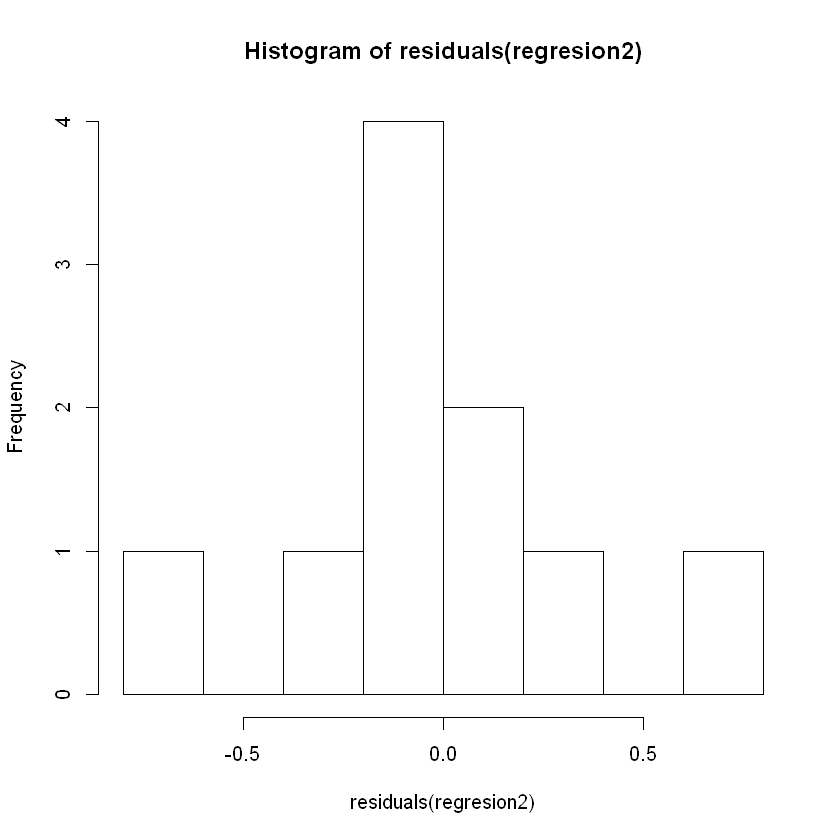

In [27]:
hist(residuals(regresion2))

In [28]:
cor(pregunta2)

,y,x1,x2
y,1.0000000,0.3127562,0.6543094
x1,0.3127562,1.0000000,0.9059507
x2,0.6543094,0.9059507,1.0000000


In [29]:
dwtest(regresion2 , alternative ="two.sided")


	Durbin-Watson test

data:  regresion2
DW = 1.3279, p-value = 0.09625
alternative hypothesis: true autocorrelation is not 0


In [30]:
1.126+ 6.430 + 0.819

[1] 8.375